In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#fatching data
data = pd.read_csv('data_decision_tree.csv')

In [8]:
# data.shape
# data.head()
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [9]:
#separating independent and dependent variables
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [17]:
# creating train and test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=101, stratify=y, test_size=0.25)

In [18]:
#to check distribution in training set
y_train.value_counts(normalize=True) #Normalize=true will give %

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [19]:
#to check distribution in validation test
y_valid.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [20]:
#shape of validation set
X_valid.shape, y_valid.shape

((223, 24), (223,))

In [21]:
#creating instance for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

dt_classifier = DecisionTreeClassifier(random_state=10)

In [22]:
#model fitting
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [24]:
#training score
dt_classifier.score(X_train, y_train)

0.9880239520958084

In [25]:
#validation score
dt_classifier.score(X_valid, y_valid)

0.7533632286995515

In [26]:
#predictions on validation set
dt_classifier.predict(X_valid)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0])

In [28]:
dt_classifier.predict_proba(X_valid)
# [prob of class1, prob of class2]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [31]:
#now changing threshold for prediction
y_pred = dt_classifier.predict_proba(X_valid)[:,1]
# y_pred

In [32]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [33]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, new_y)

0.7533632286995515

In [34]:
#changing the max_depth to increase accuracy
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_classifier.fit(X_train, y_train)
    train_accuracy.append(dt_classifier.score(X_train, y_train))
    validation_accuracy.append(dt_classifier.score(X_valid, y_valid))

In [36]:
#converting array to dataFrame for batter analysis
df = pd.DataFrame({'max_depth': range(1,10), 'train_accuracy':train_accuracy, 'valid_accuracy': validation_accuracy})
df

max_depth  train_accuracy  valid_accuracy
0          1        0.803892        0.735426
1          2        0.803892        0.735426
2          3        0.830838        0.766816
3          4        0.847305        0.771300
4          5        0.847305        0.771300
5          6        0.863772        0.775785
6          7        0.889222        0.780269
7          8        0.911677        0.784753
8          9        0.931138        0.775785

No handles with labels found to put in legend.


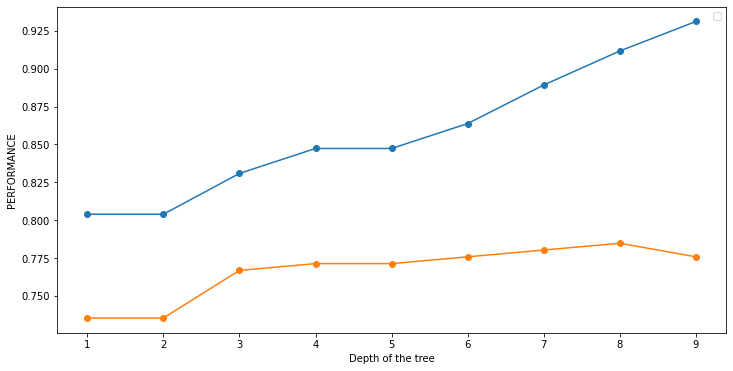

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df['max_depth'], df['train_accuracy'], marker = 'o')
plt.plot(df['max_depth'], df['valid_accuracy'], marker = 'o')
plt.xlabel('Depth of the tree')
plt.ylabel('PERFORMANCE')
plt.legend()

In [49]:
dt_classifier = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [50]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [51]:
dt_classifier.score(X_train, y_train)

0.8802395209580839

In [52]:
dt_classifier.score(X_valid, y_valid)

0.8116591928251121

In [53]:
from sklearn import tree

In [71]:
!sudo apt-get install graphviz
!pip install pydot

Face detection timeout reached
[sudo] password for param: 


In [75]:
decision_tree = tree.export_graphviz(dt_classifier,out_file='tree.dot', feature_names=X_train.columns, max_depth=3, filled=True)

In [72]:
# import pydot
# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree.png')

In [76]:
!dot -Tpng tree.dot -o tree.png

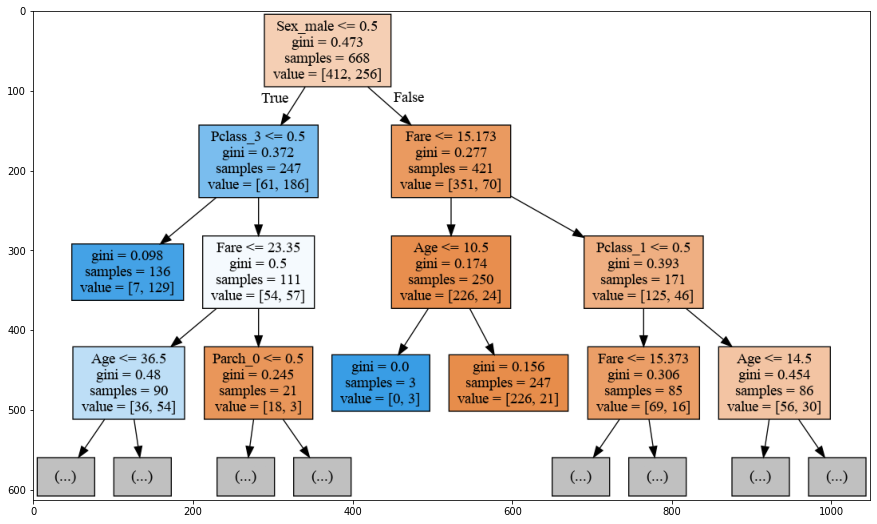

In [77]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)